In [24]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Feature 1')

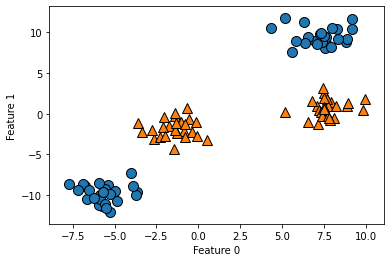

In [21]:
#The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.
#You can control how many blobs to generate and the number of samples to generate, as well as a 
#host of other properties.
#The problem is suitable for linear classification problems given the linearly separable nature 
#of the blobs.
#The example below generates a 2D dataset of samples with three blobs as a multi-class 
#classification prediction problem. Each observation has two inputs and 0, 1, or 2 class values.
#eg:  generate 2d classification dataset
#X, y = make_blobs(n_samples=100, centers=3, n_features=2)
X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

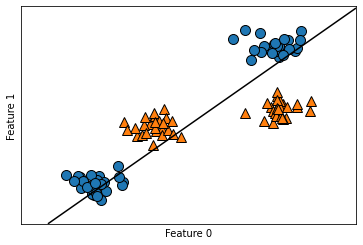

In [23]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#Linear model for classification can only seperate points using a line, and will not be able to do a very good job on this 
#dataset

<ipython-input-25-fdcb6a977d1e>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

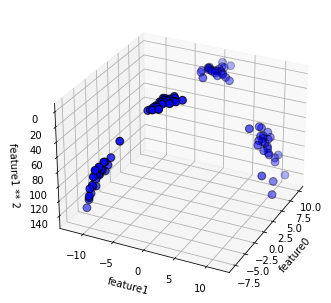

In [25]:
#now lets expand the set fo input features, say by adding feature1**2 (square of the second feature). Instead of representing
#each data point as a 2d point we now represent it as 3d points (feature0, feature1, feature1 ** 2)

X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#visualize in 3d
ax = Axes3D(figure, elev=-152, azim=-26)
#plot all the points with y ==0 and then with y==1
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-26-3ce7b338613c>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

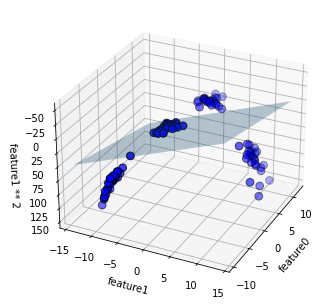

In [26]:
#in this new 3d plot it is now possible to seperate the two classes using a linear model, a plane in 3d.
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY= np.meshgrid(xx,yy)
ZZ = (coef[0]*XX + coef[1]*YY+ intercept)/ -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

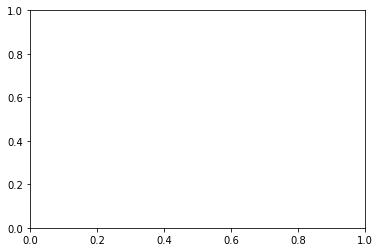

In [31]:
#The function is not really a line but a ellipse
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:,0], X[:,1],y)

plt.xlabel("Feature 0")

plt.ylabel("Feature 1")